<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_02/blob/main/DS_HW_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Частина друга: Аналіз файлів**

Проведіть аналіз файлу 2017_jun_final.csv. Файл містить результати опитування розробників у червні 2017 року.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv

df = pd.read_csv('2017_jun_final.csv')

In [3]:
# Прочитайте отриману таблицю, використовуючи метод head

df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
# Визначте розмір таблиці за допомогою методу shape

df.shape

(8704, 25)

In [5]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

for col in df.columns:

    df_col=df[col].isnull()
    spaces = df_col.sum()
    all_elements = len(df_col)
    missing_percentage = (spaces / all_elements) * 100
    print (f'In the column "{df_col.name}" prisentage of spaces is: {missing_percentage}')

In the column "N" prisentage of spaces is: 0.0
In the column "Должность" prisentage of spaces is: 0.0
In the column "Язык.программирования" prisentage of spaces is: 44.232536764705884
In the column "Специализация" prisentage of spaces is: 82.93887867647058
In the column "Общий.опыт.работы" prisentage of spaces is: 0.0
In the column "Опыт.работы.на.текущем.месте" prisentage of spaces is: 0.0
In the column "Зарплата.в.месяц" prisentage of spaces is: 0.0
In the column "Изменение.зарплаты.за.12.месяцев" prisentage of spaces is: 0.0
In the column "Город" prisentage of spaces is: 0.0
In the column "Размер.компании" prisentage of spaces is: 0.0
In the column "Тип.компании" prisentage of spaces is: 0.0
In the column "Пол" prisentage of spaces is: 0.0
In the column "Возраст" prisentage of spaces is: 0.0
In the column "Образование" prisentage of spaces is: 0.0
In the column "Университет" prisentage of spaces is: 4.1130514705882355
In the column "Еще.студент" prisentage of spaces is: 0.0
In the c

In [7]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

position = df.columns.get_loc('Язык.программирования')
df_cleaned = df.dropna(axis=1, how='any')
df_cleaned.insert(position, 'Язык.программирования', df['Язык.программирования'])

df_cleaned.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,1,Junior QA engineer,NaN,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400
1,2,Junior QA engineer,NaN,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500


In [8]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

for col in df_cleaned.columns:

    df_col=df_cleaned[col].isnull()
    spaces = df_col.sum()
    all_elements = len(df_col)
    missing_percentage = (spaces / all_elements) * 100
    print (f'In the column "{df_col.name}" prisentage of spaces is: {missing_percentage}')

In the column "N" prisentage of spaces is: 0.0
In the column "Должность" prisentage of spaces is: 0.0
In the column "Язык.программирования" prisentage of spaces is: 44.232536764705884
In the column "Общий.опыт.работы" prisentage of spaces is: 0.0
In the column "Опыт.работы.на.текущем.месте" prisentage of spaces is: 0.0
In the column "Зарплата.в.месяц" prisentage of spaces is: 0.0
In the column "Изменение.зарплаты.за.12.месяцев" prisentage of spaces is: 0.0
In the column "Город" prisentage of spaces is: 0.0
In the column "Размер.компании" prisentage of spaces is: 0.0
In the column "Тип.компании" prisentage of spaces is: 0.0
In the column "Пол" prisentage of spaces is: 0.0
In the column "Возраст" prisentage of spaces is: 0.0
In the column "Образование" prisentage of spaces is: 0.0
In the column "Еще.студент" prisentage of spaces is: 0.0
In the column "Уровень.английского" prisentage of spaces is: 0.0
In the column "Дата.заполнения" prisentage of spaces is: 0.0
In the column "User.Agent" 

In [9]:
# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

df_no_missing_rows = df_cleaned.dropna(how='any')
df_no_missing_rows.head(10)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
2,3,Software Engineer,C#/.NET,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500
3,4,Software Engineer,JavaScript,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000
4,5,Senior Software Engineer,JavaScript,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500
6,7,Junior Software Engineer,C#/.NET,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600
7,8,Senior Software Engineer,C++,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300
8,9,Junior Software Engineer,Java,0.5,0.5,550,550,Харьков,свыше 1000 человек,Аутсорсинговая,женский,23,Высшее,False,средний,12/06/2017 13:04:28,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,0.5,0.5,550
11,12,System Architect,Scala,10 и более лет,1,5600,1500,Киев,свыше 1000 человек,Аутстаффинговая,мужской,30,Высшее,False,выше среднего,12/06/2017 13:05:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,1.0,5600
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
14,15,Software Engineer,Ruby/Rails,3,1,2500,500,Киев,до 50 человек,Продуктовая,мужской,27,Высшее,False,выше среднего,12/06/2017 13:06:32,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,3.0,1.0,2500
15,16,Senior Software Engineer,JavaScript,5,5,2900,300,Винница,до 200 человек,Аутсорсинговая,мужской,26,Высшее,False,продвинутый,12/06/2017 13:06:50,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,5.0,5.0,2900


In [10]:
# Визначте новий розмір таблиці за допомогою методу shape

df_no_missing_rows.shape

(4854, 20)

In [11]:
# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

python_data = df_no_missing_rows[df_no_missing_rows['Язык.программирования'] == 'Python']
python_data.head()

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750


In [12]:
#Визначте розмір таблиці python_data за допомогою методу shape

python_data.shape

(207, 20)

In [13]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

grouped_data = python_data.groupby('Должность')

In [15]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

DataFrame = grouped_data.agg({'Зарплата.в.месяц': ['min', 'max']})
DataFrame.head()

Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200

In [25]:
# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

def fill_avg_salary(row):
    return row['Зарплата.в.месяц'].mean()
DataFrame['avg'] = DataFrame.apply(fill_avg_salary, axis=1)
DataFrame.head()

Зарплата.в.месяц           avg
                                      min   max        
Должность                                              
Junior Software Engineer              100  1250   675.0
Senior Software Engineer             1300  9200  5250.0
Software Engineer                     500  5400  2950.0
System Architect                     3000  5000  4000.0
Technical Lead                       1425  6200  3812.5

In [17]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.

avg_statistics = DataFrame['avg'].describe()

# Виведення результатів
print(avg_statistics)

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64


In [18]:
# Збережіть отриману таблицю в CSV файл

DataFrame.to_csv('DataFrame.csv', index=False)

**Візуалізація**

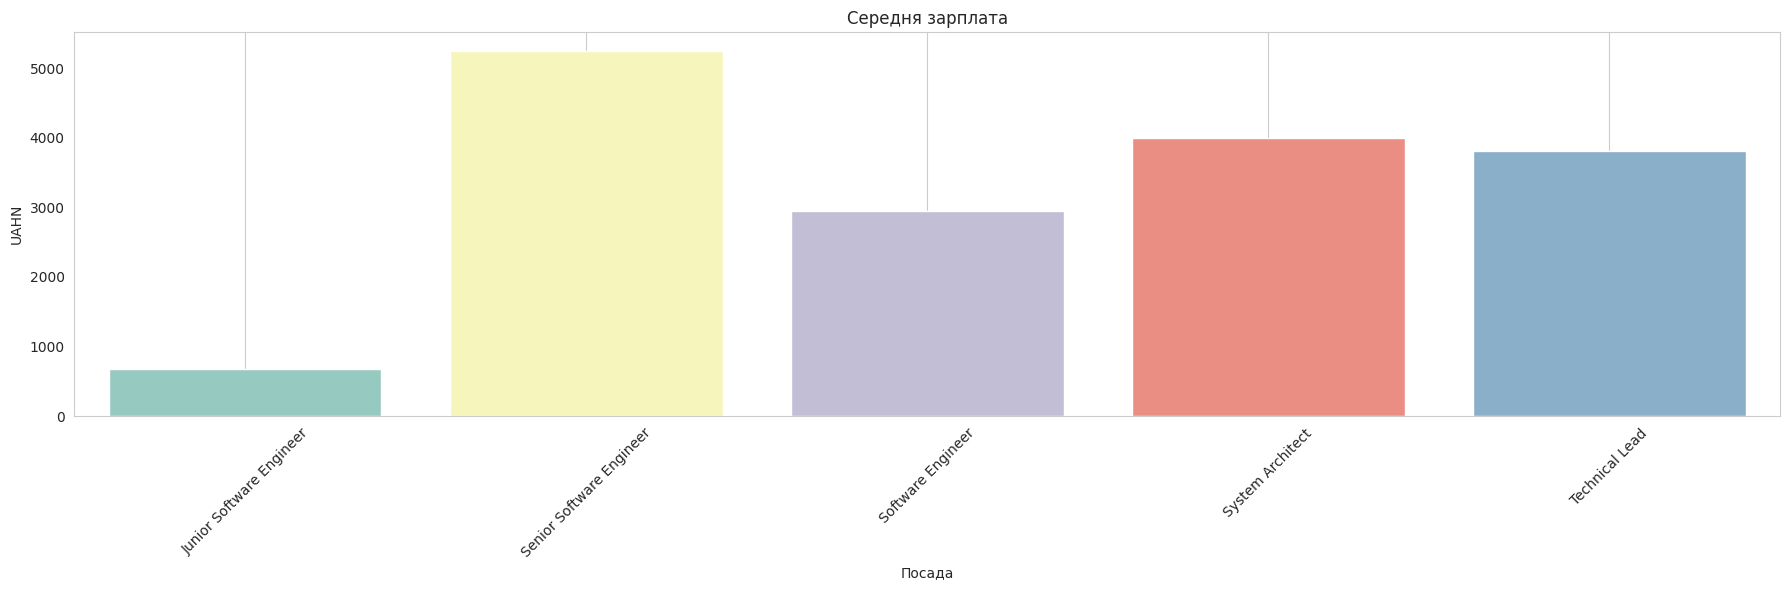

In [24]:
df = DataFrame.copy()
sns.set_style("whitegrid")

plt.figure(figsize=(18, 6))
sns.barplot(x=df.index, y='avg', data=df, palette='Set3')
plt.title('Середня зарплата')
plt.xlabel('Посада')
plt.ylabel('UAHN')
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

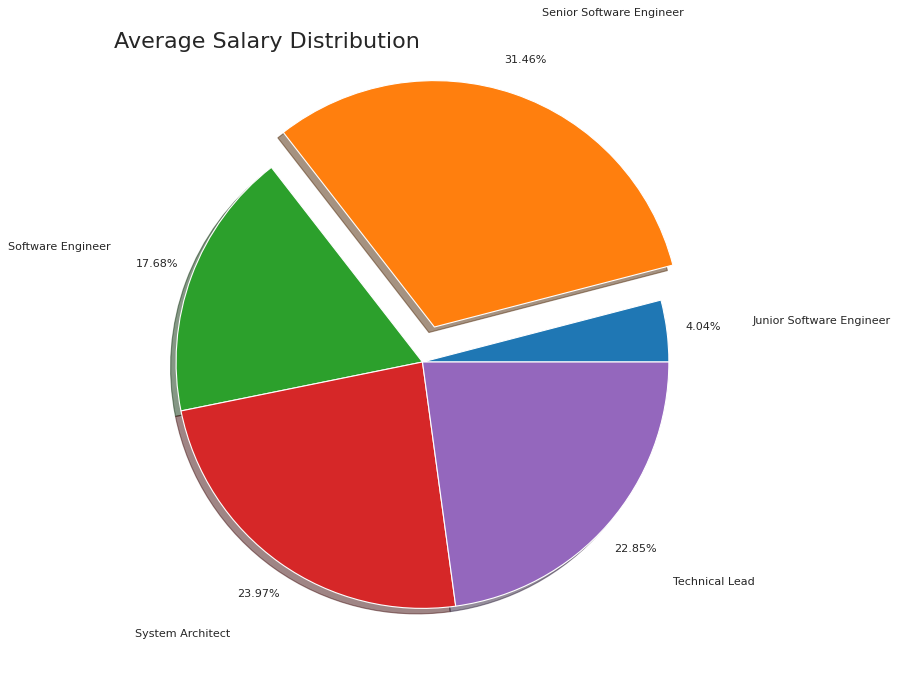

In [37]:
plt.figure(figsize=(10, 10), dpi=80)

labels = df.index
data = df['avg'].values

explode = [0, 0.15, 0, 0, 0]

plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.title('Average Salary Distribution', loc='left', fontsize=20)

plt.show()

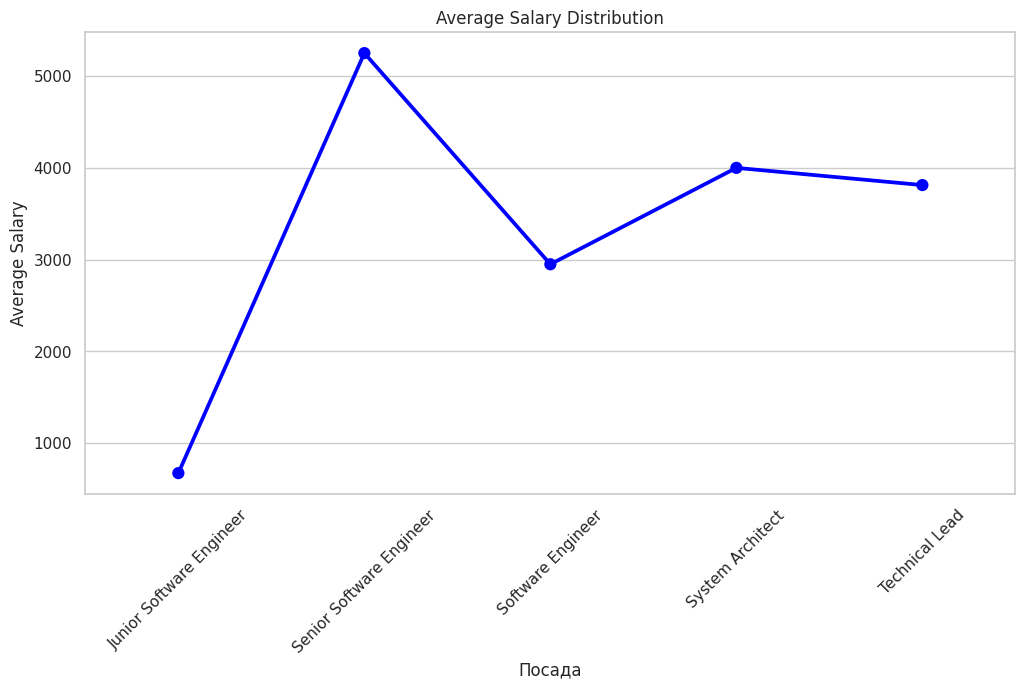

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.pointplot(x=df.index, y='avg', data=df, color='blue', markers='o', linestyles='-')

plt.xlabel('Посада')
plt.ylabel('Average Salary')
plt.title('Average Salary Distribution')

plt.xticks(rotation=45)

plt.show()

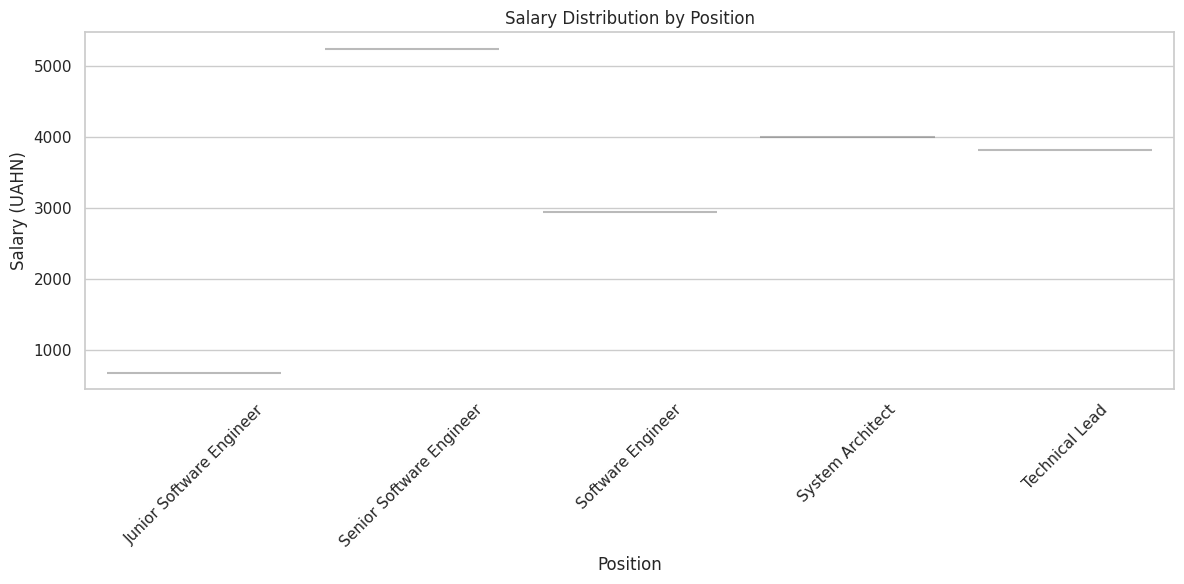

In [44]:
df = DataFrame.copy()
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxenplot(x=df.index, y='avg', data=df, palette='Set3')

plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary (UAHN)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()